In [234]:
import numpy as np
import matplotlib.pyplot as plt

In [235]:
mask_length = 1000  # マスクの長さを指定
mask = np.random.randint(2, size=mask_length)  # 0または1をランダムに生成する配列を作成
# print(mask)

detector_length = mask_length * 3
# print(detector_length)

#マスクの3倍の長さの検出器を用意
detector = np.zeros(detector_length)
# print(detector)

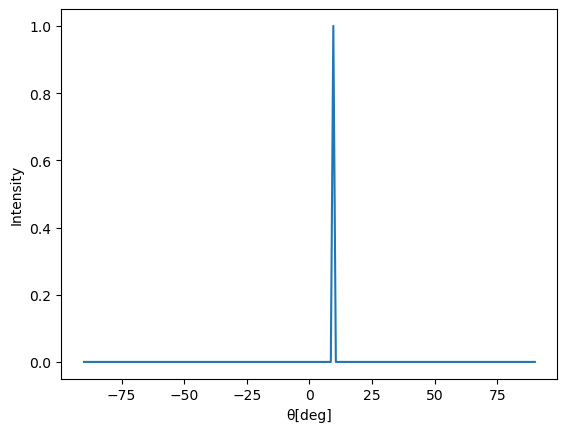

In [236]:
N = 180  # 要素数N、すなわち空間の角度分解能を指定

# 要素数NのNumPy配列を作成して全ての要素を0で初期化
object_distribution = np.zeros(N)

# 81番目の要素に1を代入、すなわちθ=10度（中心からの角度）の方向に天体があることを表す
k = 80
object_distribution[k] = 1

# print(object_distribution)

theta = np.linspace(90,-90,N) # 0から180までの数をN個生成

plt.plot(theta,object_distribution) # グラフを描画
plt.xlabel("θ[deg]") # x軸のラベルを指定
plt.ylabel("Intensity") # y軸のラベルを指定
plt.show() # グラフを表示


In [237]:
# マスクと検出器の距離
l = 5

# 検出器の中心からどれだけズレた位置からマスクの影が始まるか
d = l * np.tan(np.deg2rad(90-k)) - round(mask_length / 2)
#print(l*np.tan(np.deg2rad(90-k)))
print(d)

# その位置を四捨五入して整数にする
d = round(d) 
#print(d)

# 検出器の端からマスクの影が始まる位置までの距離
d_result = round(detector_length / 2) + d 
print(d_result)

# d_result番目の要素からmaskを足す
detector[d_result:d_result + len(mask)] = mask

detector_image = detector
print(detector_image)
print(len(detector_image))


-499.1183650964577
1001
[0. 0. 0. ... 0. 0. 0.]
3000


In [238]:
# 検出器イメージの右端に0を追加（端に光が当たったときのため）
detector_image = np.insert(detector_image, len(detector_image), [0] * mask_length)
print(detector_image)
print(len(detector_image))

[0. 0. 0. ... 0. 0. 0.]
4000


In [239]:
correlation = []

for i in range(len(detector_image)- mask_length):
    inner_product = np.sum(mask * detector_image[i:i+mask_length]) # i番目からi+mask_length-1番目までの要素を取り出して内積を計算
    correlation.append(inner_product)

correlation_result = np.array(correlation)
print(correlation_result)
print(len(correlation_result))

[0. 0. 0. ... 0. 0. 0.]
3000


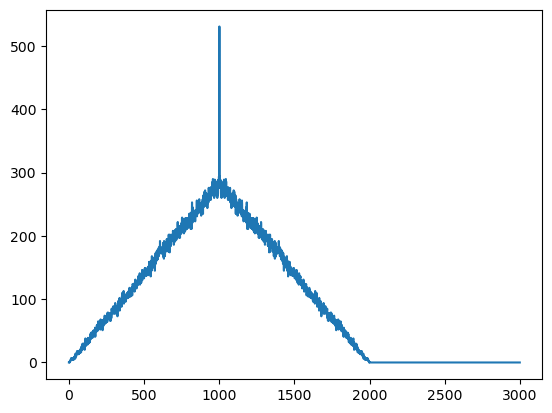

In [240]:
plt.plot(correlation_result)

[-89.71352349 -89.71323673 -89.7129494  ...  89.85654567  89.85661747
  89.85668919]


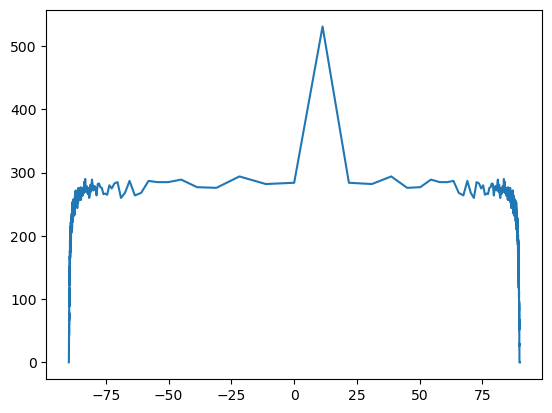

In [241]:
x = np.arange(0, detector_length, 1)
# print(x)
# print(len(x))

# 角度に変換
theta = np.rad2deg(np.arctan((x - round(detector_length / 2)+round(mask_length / 2)) / l))
print(theta)

plt.plot(theta, correlation_result)

In [242]:
# # 相関を取ったあとの配列の中で最大値をとる要素のインデックスを取得
# peak = np.argmax(correlation_result)
# print("x=",peak)

# # 天体の位置（角度）に再合成
# detected_object_distribution = np.arctan((peak - detector_length / 2) / l) # ラジアンで返ってくる
# print(detected_object_distribution)

# # ラジアンを度に変換
# detected_object_distribution = np.rad2deg(detected_object_distribution)
# print(detected_object_distribution)
